# Implement SGD on bston dataset
Dataset from sklearn load_boston

The GD is theta=theta-alpha*derivative(cost function)
equ=y=wtx+b; 
cost = (y-wtx-b)^2 
determinant wrt w=> -2(y-wtx-b)x 
determinant wrt b => -2(y-wtx-b); 
in general : loss*  These are in vec notation

h=np.dot(x,theta);
loss=h-y;
cost=np.sum(loss**2)/(2*m);
gradient=np.dot(xt,loss)/m;
theta=theta-alpha*gradient    

# Objective
Implement the model and compare the intercept and weights with sklearn

# Import data and libraries

In [31]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
print(boston.data.shape)
boston.data[0:1]

(506, 13)


array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00]])

# Create model

In [32]:
# Create all functions

#m=no of obs,n=no of features
def grad(x,y,theta,alpha=.000055,iteration=1000,k=200):
  
  #for SGD
  m=x.shape[0]
  
  idx=np.random.randint(m,size=k)
  x=x[idx,:]
  y=np.random.choice(y,k)
  #print('for SGD new size',x.shape,y.shape)

  m,n=np.shape(x)
  xt=x.transpose()
  #print("x y, theta , m,n,shape before multiply",x.shape,y.shape,theta.shape,m,n)
  oldcost=0
  bold=0
  l=0
  thetaprev=theta
  prevalpha=alpha 
  optimumcost=0
  ind=0   
  for i in range(0,iteration):
     l=l+1
     h=np.dot(x,theta)
     #print("\nbefore loss h and y",h.shape,y.shape)
     loss=h-y
     #print('loss',loss)
     cost=np.sum(loss**2)/(2*k)
     #if (oldcost^=0 & cost-oldcost<20):
     #       break;
     #if change is very slow increase alpha 
     b=(cost-oldcost)/oldcost
     #print("At iteration %d Cost : %f oldcost : %f alpha %f cost compare %f" %(i,cost,oldcost,alpha,b))
     #if ((b>0 & bold<0) | (b<0 & bold>0)):
     if((cost>oldcost) & (oldcost>0) & (ind==0)): 
         #set optimumcost only one time
            ind=1
            optimumcost=oldcost  
            alpha=alpha/2
            print("opt cost,ind",optimumcost,ind)
            theta=thetaprev
            print('new alpha',alpha,'cost',cost,'old cost',oldcost)
            continue   
     elif ((b>-.05) & (ind==0)):
            alpha=alpha*2
     #elif (ind==1):
     #       alpha=alpha*1.15
     #       ind=2
     
     gradient=np.dot(xt,loss)/k
     #print("\ngradient\n",gradient)
     theta=theta-alpha*gradient
     aa=alpha*gradient
     b=(cost-oldcost)/oldcost
     oldcost=cost   
     thetaprev=theta
     prevalpha=alpha
  return theta,cost 
     
def data(x,y,k=10):    
  x=np.append(x, np.ones([x.shape[0], 1]), axis=1)  #with intercept
  #without intercept
  n1=np.shape(x)[1]

  theta=np.random.randn(n1)
  print("theta passed shaped",theta.shape,theta)
  newtheta,cost=grad(x,y,theta)
  print('coefficient of mymodel',newtheta)
  return newtheta,cost  
    
def predict(x,newtheta):
    x=np.append(x, np.ones([x.shape[0], 1]), axis=1) #with intercept
    #without intercept
    y=np.dot(x,newtheta)
    return y

def cost1(y_pred,y_test):
    loss=y_pred-y_test
    cost=np.sum(loss**2)/(2*y_test.shape[0])
    return cost

# Use the model on boston data

theta passed shaped (14,) [-0.34928575 -0.25273551  0.22934504  3.46410518 -1.1349958  -0.08180187
  0.99810155 -0.61935544  0.78171907  1.39291839 -0.62273601 -0.06825148
 -1.26065196  0.12707627]
opt cost,ind 46.4587664143 1
new alpha 1.80224 cost 46.471094579 old cost 46.4587664143
coefficient of mymodel [ -7.71569671   5.26571763   1.62570695  -1.8206091   -1.09320552
  -0.41060108   0.29656759  -0.41699153   1.24613633   1.90826953
  -0.41670367   0.35683023  -0.98397464  22.37734593]
mymodel cost from the train 46.3899626879
my model cost from the test 15.7528961505


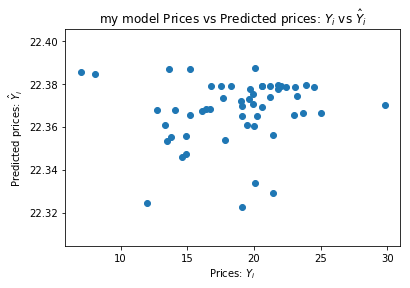

In [38]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
y=np.array(boston.target)
x=np.array(boston.data)
from sklearn.preprocessing import normalize
x = normalize(x, norm='l1', axis=0)

x_train=x[0:450]
x_test=x[451:505]
y_train=y[0:450]
y_test=y[451:505]
#print("train test split",x_train.shape,x_test.shape,y_train.shape,y_test.shape)

newtheta,cost=data(x_train,y_train)    
print("mymodel cost from the train",cost)
#predict
y_pred=predict(x_train,newtheta)
cost=cost1(y_pred,y_train)

y_pred=predict(x_test,newtheta)
c=cost1(y_pred,y_test)

#print(y_pred.shape,y_test.shape)
print("my model cost from the test",c)
aa=pd.DataFrame({'type':['mymodel'],'train_cost':[cost],'test_cost':[c],'Coeff':[newtheta]})
#print(aa)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("my model Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()



# Use SKLEAR model on boston data

In [39]:
import warnings
warnings.filterwarnings('ignore')

# Use sklearn
import pandas as pd
from sklearn.linear_model import SGDRegressor
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)


print(y_train.shape,y_test.shape,x_train.shape,x_test.shape)
lm = SGDRegressor(fit_intercept=True)
lm.fit(x_train, y_train)
#print(lm.coef_)
#y_test.reshape(-1,1)
#np.reshape(y_test,54)
#print(y_test.shape)
y_pred = lm.predict(x_train)
print('coefficient of sklearn model',lm.intercept_,lm.coef_)

#c=cost1(y_pred,y_train)
y_predtrain = lm.predict(x_train)
print("sklearn Cost from train")
print(lm.score(x_train,y_train))

#c1=cost1(y_pred,y_test)
y_predtest = lm.predict(x_test)
#print("sklearn Cost from test",lm.score(y_predtest,y_test))
bb=pd.DataFrame({'type':['sklearn'],'train_cost':[lm.score(x_train,y_train)],'test_cost':[lm.score(x_test,y_test)],'Coeff':[lm.coef_]})
aa=aa.append(bb)

#plt.scatter(y_test, y_pred)
#plt.xlabel("Prices: $Y_i$")
#plt.ylabel("Predicted prices: $\hat{Y}_i$")
#plt.title("sklearn Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
#plt.show()

print(aa)

(450, 1) (54, 1) (450, 13) (54, 13)
coefficient of sklearn model [ 22.72590254] [-0.03641638  0.10968696  0.01996954  0.10433229  0.03722955  0.05162522
  0.03193732  0.05758237  0.01346549  0.02822044  0.03969217  0.05168383
  0.0100268 ]
sklearn Cost from train
-0.00103925117368
                                               Coeff  test_cost  train_cost  \
0  [-7.71569671429, 5.26571762679, 1.62570695438,...  15.752896   45.193189   
0  [-0.0364163845211, 0.109686964888, 0.019969538...  -0.945312   -0.001039   

      type  
0  mymodel  
0  sklearn  


# Score comparision


In [40]:
print(aa)

                                               Coeff  test_cost  train_cost  \
0  [-7.71569671429, 5.26571762679, 1.62570695438,...  15.752896   45.193189   
0  [-0.0364163845211, 0.109686964888, 0.019969538...  -0.945312   -0.001039   

      type  
0  mymodel  
0  sklearn  


In [41]:
print('sklearn coeff',lm.intercept_,lm.coef_)
#aa[]
print('mymodel theta including intercept',newtheta[0],newtheta[1:])

sklearn coeff [ 22.72590254] [-0.03641638  0.10968696  0.01996954  0.10433229  0.03722955  0.05162522
  0.03193732  0.05758237  0.01346549  0.02822044  0.03969217  0.05168383
  0.0100268 ]
mymodel theta including intercept -7.71569671429 [  5.26571763   1.62570695  -1.8206091   -1.09320552  -0.41060108
   0.29656759  -0.41699153   1.24613633   1.90826953  -0.41670367
   0.35683023  -0.98397464  22.37734593]


# Observation
1. While trying learning rate of different value sometimes cost is going towards very hogh value, so tried with higher value
2. After trying more iteration cost is going down with a very small alpha value
3. sklearn model is performing better with cost close to 0 but my model cost is close to 30
4. Best cost is achieved by different trial cost function
5. theta are not changing much from initial random value (when alpha like .000005) 
6. when alpha taken like .05 , gradient is becoming too high. cost function is becoming inf, theta are becoming very high
7. sklearn model is always getting global minimum but my model doesnot